In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Dataset/classification/weather.csv')

In [26]:
df.isnull().sum()

province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
dtype: int64

In [28]:
# Kiểm tra giá trị không hợp lệ
invalid_values = {
    "cloud": df[(df['cloud'] < 0) | (df['cloud'] > 100)].shape[0],
    "max": df[df['max'] < -50].shape[0],
    "min": df[df['min'] < -50].shape[0],
    "rain": df[df['rain'] < 0].shape[0],
    "humidi": df[(df['humidi'] < 0) | (df['humidi'] > 100)].shape[0],
}

invalid_values

{'cloud': 0, 'max': 0, 'min': 0, 'rain': 0, 'humidi': 0}

In [29]:
df.describe()

,max,min,wind,rain,humidi,cloud,pressure
count,177411.000000,177411.000000,177411.000000,177411.000000,177411.000000,177411.000000,177411.000000
mean,29.846182,23.317788,11.106763,6.628414,77.156828,41.498515,1010.203933
std,4.520925,3.909337,5.337878,13.695427,9.231037,23.771310,4.560205
min,4.000000,2.000000,1.000000,0.000000,23.000000,0.000000,988.000000
25%,28.000000,22.000000,7.000000,0.100000,72.000000,23.000000,1008.000000
50%,31.000000,24.000000,10.000000,1.800000,78.000000,38.000000,1010.000000
75%,33.000000,26.000000,14.000000,7.600000,84.000000,58.000000,1012.000000
max,46.000000,32.000000,54.000000,596.400000,100.000000,100.000000,1038.000000


In [8]:
# kiểm tra cấu trúc dữ liệu
def check(df):
    l =[]
    columns = df.columns
    for col in columns:
        dtypes = df[col].dtypes
        nunique = df[col].nunique()
        sum_null = df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check = pd.DataFrame(l, columns = ['Column','Type','Nunique','Null Count'])
    return df_check
check(df)

,Column,Type,Nunique,Null Count
0,province,object,39,0
1,max,int64,43,0
2,min,int64,31,0
3,wind,int64,51,0
4,wind_d,object,16,0
5,rain,float64,1298,0
6,humidi,int64,77,0
7,cloud,int64,101,0
8,pressure,int64,49,0
9,date,object,4549,0


In [9]:
df['province'].unique()

array(['Bac Lieu', 'Ho Chi Minh City', 'Tam Ky', 'Ben Tre', 'Hoa Binh',
       'Tan An', 'Bien Hoa', 'Hong Gai', 'Thai Nguyen', 'Buon Me Thuot',
       'Hue', 'Thanh Hoa', 'Ca Mau', 'Long Xuyen', 'Tra Vinh', 'Cam Pha',
       'My Tho', 'Tuy Hoa', 'Cam Ranh', 'Nam Dinh', 'Uong Bi', 'Can Tho',
       'Nha Trang', 'Viet Tri', 'Chau Doc', 'Phan Rang', 'Vinh', 'Da Lat',
       'Phan Thiet', 'Vinh Long', 'Ha Noi', 'Play Cu', 'Vung Tau',
       'Hai Duong', 'Qui Nhon', 'Yen Bai', 'Hai Phong', 'Rach Gia',
       'Soc Trang'], dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177411 entries, 0 to 177410
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   province  177411 non-null  object 
 1   max       177411 non-null  int64  
 2   min       177411 non-null  int64  
 3   wind      177411 non-null  int64  
 4   wind_d    177411 non-null  object 
 5   rain      177411 non-null  float64
 6   humidi    177411 non-null  int64  
 7   cloud     177411 non-null  int64  
 8   pressure  177411 non-null  int64  
 9   date      177411 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 13.5+ MB


In [20]:
# Hiển thị thông tin tổng quan về dữ liệu
weather_data_info = {
    "columns": df.columns.tolist(),
    "head": df.head(),
    "summary": df.describe(),
    "missing_values": df.isnull().sum()
}

print(weather_data_info)

{'columns': ['province', 'max', 'min', 'wind', 'wind_d', 'rain', 'humidi', 'cloud', 'pressure', 'date'], 'head':    province  max  min  wind wind_d  rain  humidi  cloud  pressure        date
0  Bac Lieu   27   22    17    NNE   6.9      90     71      1010  2009-01-01
1  Bac Lieu   31   25    20    ENE   0.0      64     24      1010  2010-01-01
2  Bac Lieu   29   24    14      E   0.0      75     45      1008  2011-01-01
3  Bac Lieu   30   24    30      E   0.0      79     52      1012  2012-01-01
4  Bac Lieu   31   25    20    ENE   0.0      70     24      1010  2013-01-01, 'summary':                  max            min           wind           rain  \
count  177411.000000  177411.000000  177411.000000  177411.000000   
mean       29.846182      23.317788      11.106763       6.628414   
std         4.520925       3.909337       5.337878      13.695427   
min         4.000000       2.000000       1.000000       0.000000   
25%        28.000000      22.000000       7.000000       0.100

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

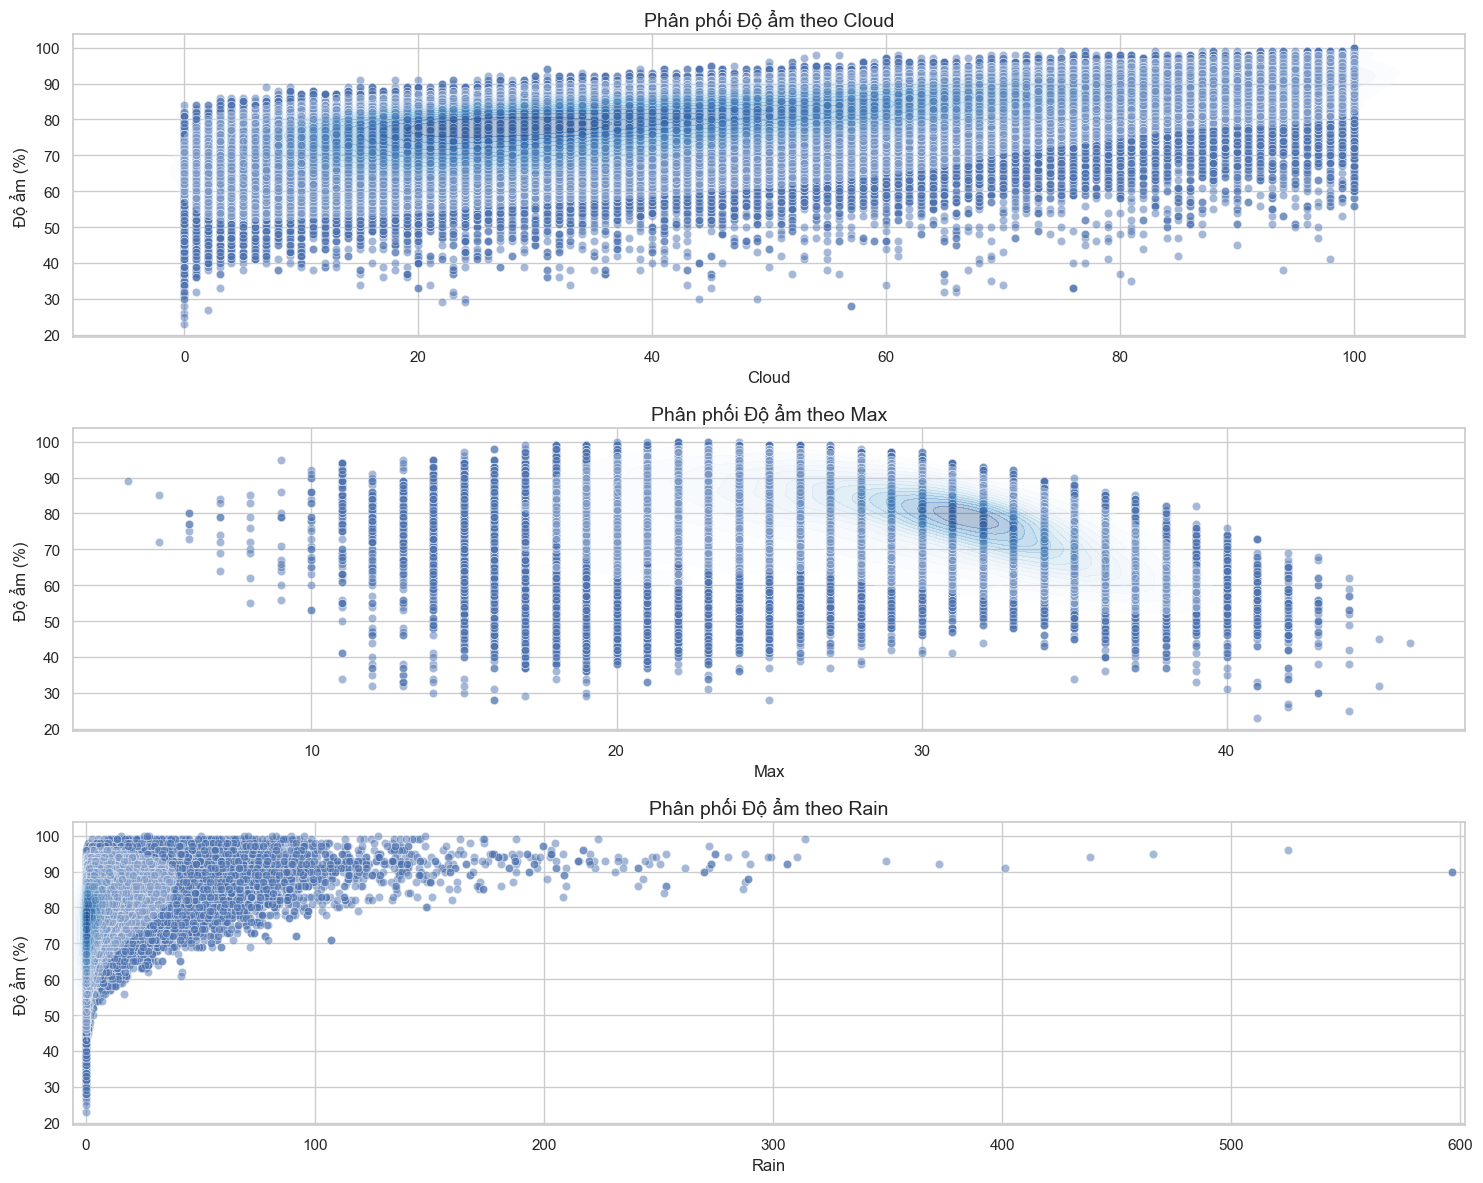

In [21]:
# Tùy chỉnh kiểu hiển thị
sns.set_theme(style="whitegrid")

# Vẽ các biểu đồ phân tích
features = ['cloud', 'max', 'rain']
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 1, i)
    sns.scatterplot(data=df, x=feature, y='humidi', alpha=0.5)
    sns.kdeplot(data=df, x=feature, y='humidi', cmap="Blues", fill=True, alpha=0.3, levels=15)
    plt.title(f"Phân phối Độ ẩm theo {feature.capitalize()}", fontsize=14)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Độ ẩm (%)')

plt.tight_layout()
plt.show()


C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

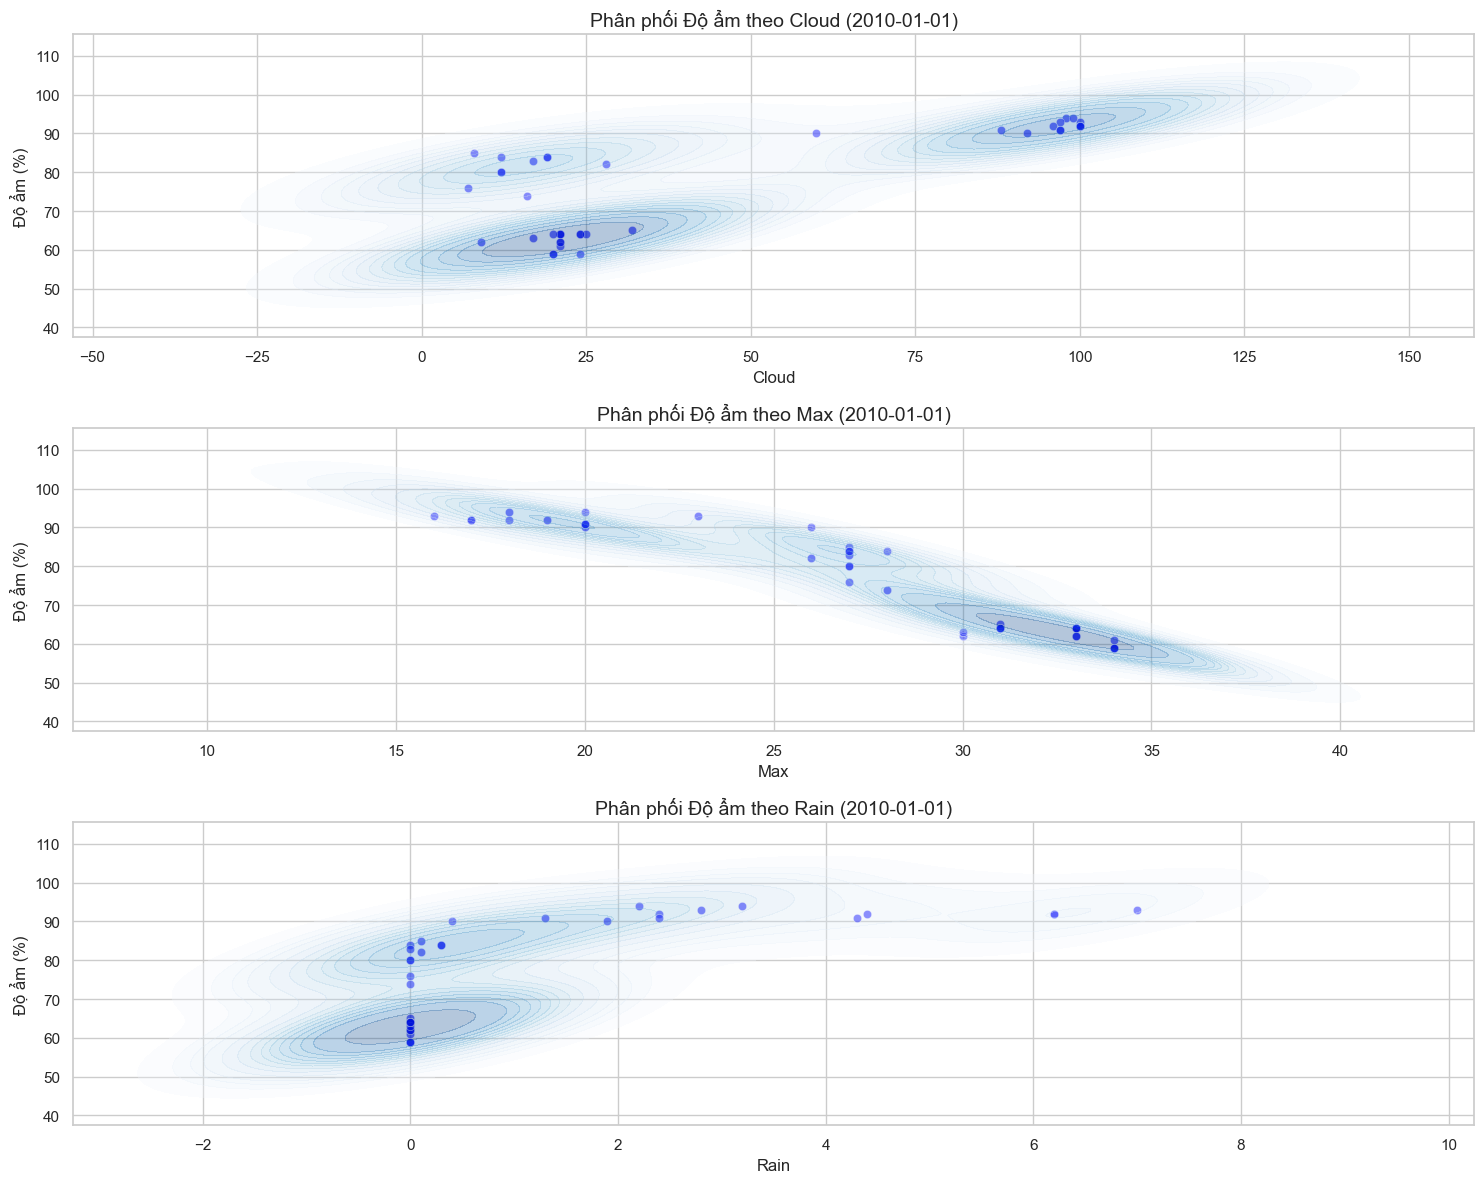

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn ngày cụ thể (ví dụ: "2010-01-01")
specific_date = "2010-01-01"
filtered_data = df[df['date'] == specific_date]

# Tùy chỉnh kiểu hiển thị
sns.set_theme(style="whitegrid")

# Vẽ các biểu đồ phân tích
features = ['cloud', 'max', 'rain']
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 1, i)
    sns.scatterplot(data=filtered_data, x=feature, y='humidi', alpha=0.6, color='blue')
    sns.kdeplot(data=filtered_data, x=feature, y='humidi', cmap="Blues", fill=True, alpha=0.3, levels=15)
    plt.title(f"Phân phối Độ ẩm theo {feature.capitalize()} ({specific_date})", fontsize=14)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Độ ẩm (%)')

plt.tight_layout()
plt.show()


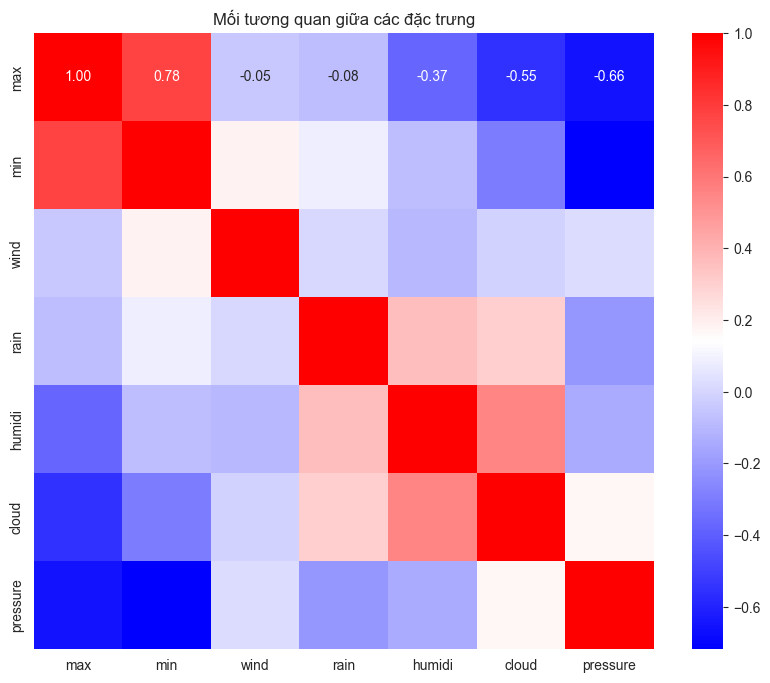

humidi      1.000000
cloud       0.551849
rain        0.360218
min        -0.078825
wind       -0.095659
pressure   -0.147659
max        -0.372964
Name: humidi, dtype: float64

In [14]:
# Tính ma trận tương quan giữa các cột số
correlation_matrix = df[['max', 'min', 'wind', 'rain', 'humidi', 'cloud', 'pressure']].corr()

# Vẽ heatmap để trực quan hóa ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt=".2f")
plt.title('Mối tương quan giữa các đặc trưng')
plt.show()

correlation_matrix['humidi'].sort_values(ascending=False)

## TACH DU LIEU THANH CAC TINH

In [4]:
# Create a directory to store the split datasets
import os
output_dir = '/Dataset/Dataset_Vietnam'
os.makedirs(output_dir, exist_ok=True)

# Split the dataset by 'province' and save each to a separate CSV file
province_groups = df.groupby('province')
file_paths = []

for province, group in province_groups:
    # Define the file path for each province CSV
    file_name = f"{province}.csv"
    file_path = os.path.join(output_dir, file_name)
    group.to_csv(file_path, index=False)
    file_paths.append(file_path)

file_paths[:5]

['C:\\ML_Data\\Dataset_Vietnam\\Bac Lieu.csv',
 'C:\\ML_Data\\Dataset_Vietnam\\Ben Tre.csv',
 'C:\\ML_Data\\Dataset_Vietnam\\Bien Hoa.csv',
 'C:\\ML_Data\\Dataset_Vietnam\\Buon Me Thuot.csv',
 'C:\\ML_Data\\Dataset_Vietnam\\Ca Mau.csv']

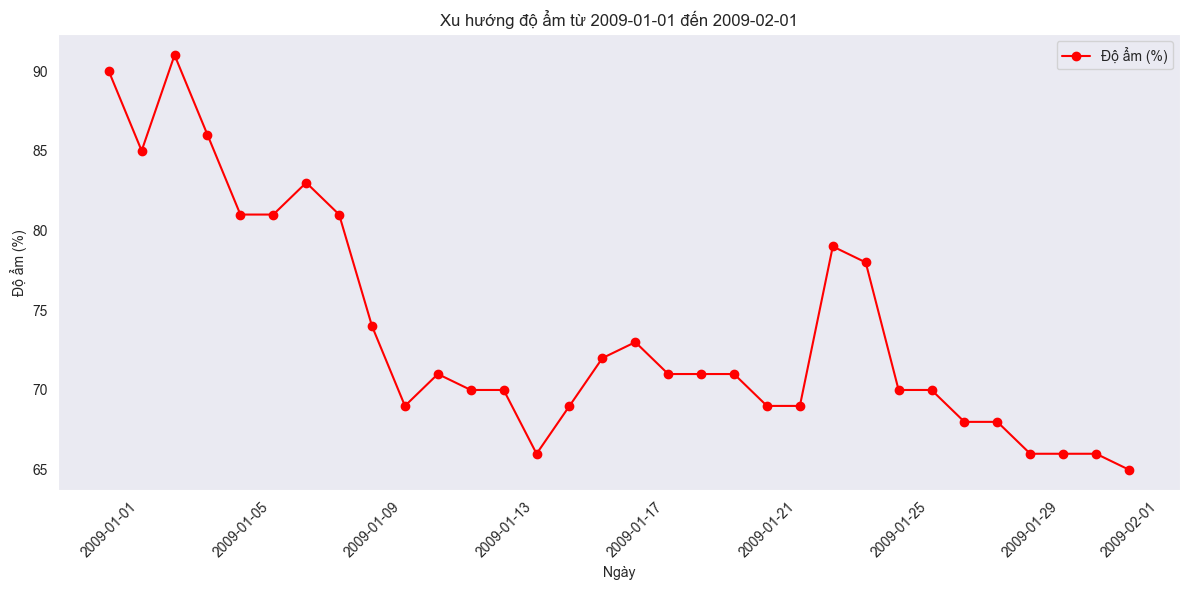

In [15]:
# Đọc dữ liệu của một tỉnh từ file CSV (chỉnh lại đường dẫn tới file)
data = pd.read_csv('/Dataset/Dataset_Vietnam\Bac Lieu.csv')

# Chuyển đổi cột ngày sang định dạng datetime
data['date'] = pd.to_datetime(data['date'])

# Sắp xếp dữ liệu theo ngày (nếu chưa sắp xếp)
data = data.sort_values(by='date')

# Lọc dữ liệu theo khoảng thời gian nhất định (chỉnh lại ngày theo nhu cầu)
start_date = '2009-01-01'
end_date = '2009-02-01'
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Vẽ biểu đồ xu hướng độ ẩm
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], filtered_data['humidi'], marker='o', color='r', label='Độ ẩm (%)')
plt.title(f"Xu hướng độ ẩm từ {start_date} đến {end_date}")
plt.xlabel("Ngày")
plt.ylabel("Độ ẩm (%)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


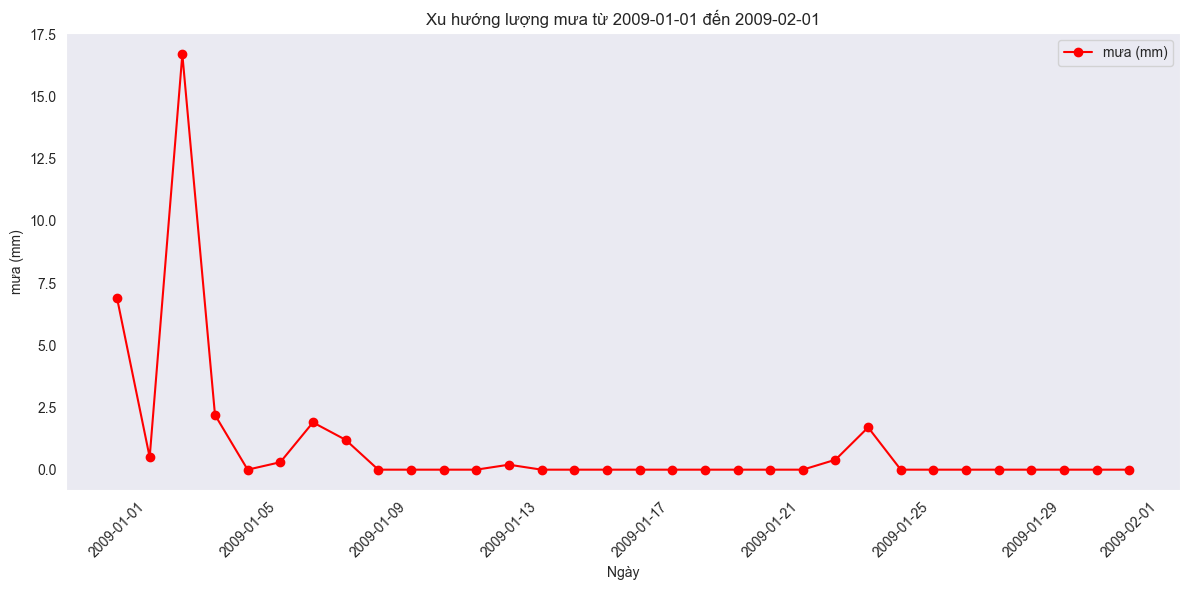

In [13]:
# Đọc dữ liệu của một tỉnh từ file CSV (chỉnh lại đường dẫn tới file)
data = pd.read_csv('/Dataset/Dataset_Vietnam\Bac Lieu.csv')

# Chuyển đổi cột ngày sang định dạng datetime
data['date'] = pd.to_datetime(data['date'])

# Sắp xếp dữ liệu theo ngày (nếu chưa sắp xếp)
data = data.sort_values(by='date')

# Lọc dữ liệu theo khoảng thời gian nhất định (chỉnh lại ngày theo nhu cầu)
start_date = '2009-01-01'
end_date = '2009-02-01'
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Vẽ biểu đồ xu hướng độ ẩm
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], filtered_data['rain'], marker='o', color='r', label='mưa (mm)')
plt.title(f"Xu hướng lượng mưa từ {start_date} đến {end_date}")
plt.xlabel("Ngày")
plt.ylabel("mưa (mm)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


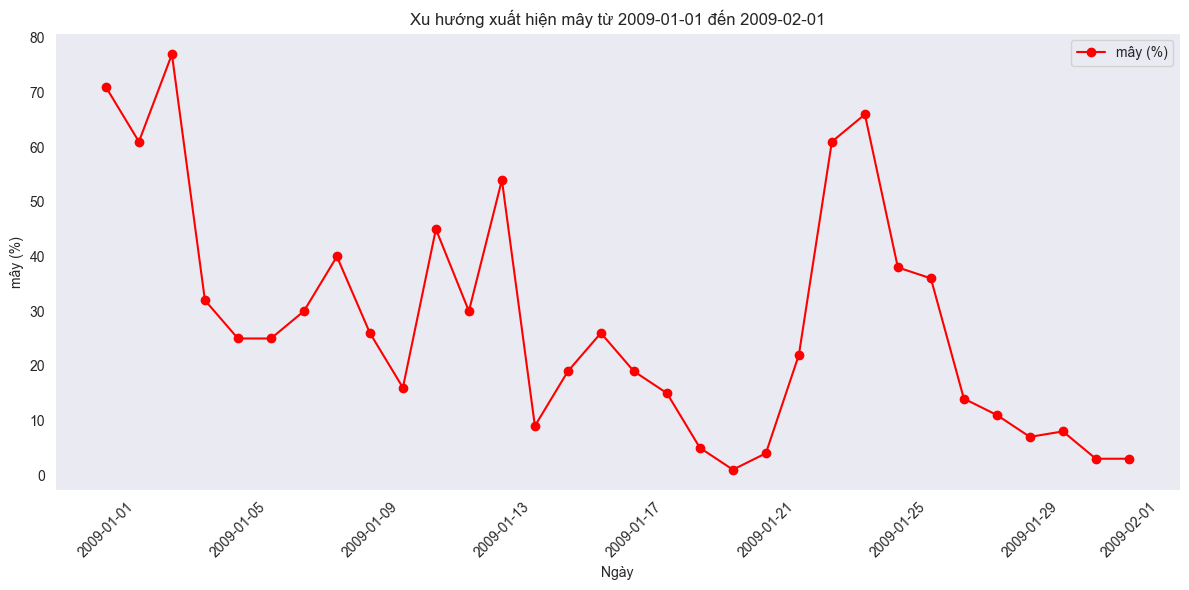

In [16]:
# Đọc dữ liệu của một tỉnh từ file CSV (chỉnh lại đường dẫn tới file)
data = pd.read_csv('/Dataset/Dataset_Vietnam\Bac Lieu.csv')

# Chuyển đổi cột ngày sang định dạng datetime
data['date'] = pd.to_datetime(data['date'])

# Sắp xếp dữ liệu theo ngày (nếu chưa sắp xếp)
data = data.sort_values(by='date')

# Lọc dữ liệu theo khoảng thời gian nhất định (chỉnh lại ngày theo nhu cầu)
start_date = '2009-01-01'
end_date = '2009-02-01'
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Vẽ biểu đồ xu hướng độ ẩm
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], filtered_data['cloud'], marker='o', color='r', label='mây (%)')
plt.title(f"Xu hướng xuất hiện mây từ {start_date} đến {end_date}")
plt.xlabel("Ngày")
plt.ylabel("mây (%)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


## Train Model vào các model khác nhau theo tỉnh

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Mean Absolute Error (MAE): 4.83
Root Mean Squared Error (RMSE): 6.40


C:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


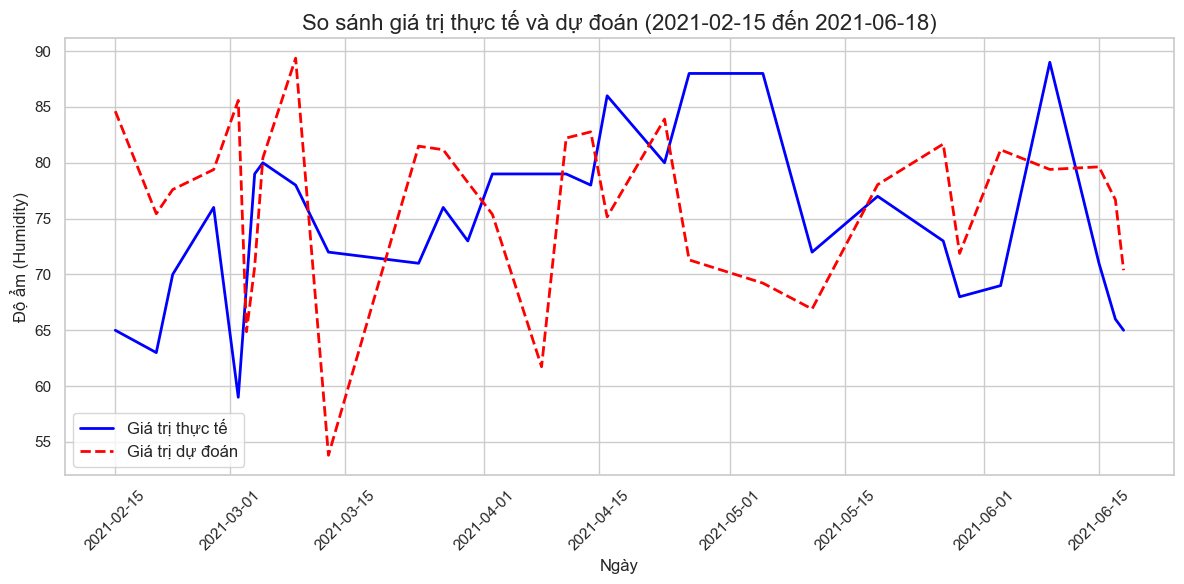

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
data = pd.read_csv('/Dataset/Dataset_Vietnam\Yen Bai.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.sort_index()

# Tạo biến đầu vào (X) và biến mục tiêu (y)
X = data[['cloud', 'max', 'rain']]
y = data['humidi']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gán lại index cho y_test để đảm bảo chỉ số đúng
y_test = pd.Series(y_test, index=X_test.index)

# Định nghĩa mô hình và tham số cần tìm kiếm
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất
best_params = grid_search.best_params_
print("Best Parameters for Random Forest:", best_params)

# Dự đoán với mô hình tốt nhất
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Chọn khoảng thời gian hiển thị
y_test = y_test.sort_index()  # Sắp xếp lại nếu cần
start_date = y_test.index[-30]  # 30 ngày cuối trong tập kiểm tra
end_date = y_test.index[-1]

# Lọc dữ liệu cho khoảng thời gian này
y_test_filtered = y_test.loc[start_date:end_date]
y_pred_filtered = pd.Series(y_pred, index=y_test.index).loc[start_date:end_date]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(y_test_filtered.index, y_test_filtered, label='Giá trị thực tế', color='blue', linewidth=2)
plt.plot(y_pred_filtered.index, y_pred_filtered, label='Giá trị dự đoán', color='red', linestyle='--', linewidth=2)
plt.title(f'So sánh giá trị thực tế và dự đoán ({start_date.date()} đến {end_date.date()})', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Độ ẩm (Humidity)', fontsize=12)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for Linear Regression: {'lr__fit_intercept': True, 'poly__degree': 4}
Mean Absolute Error (MAE): 10.41
Root Mean Squared Error (RMSE): 13.58


C:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


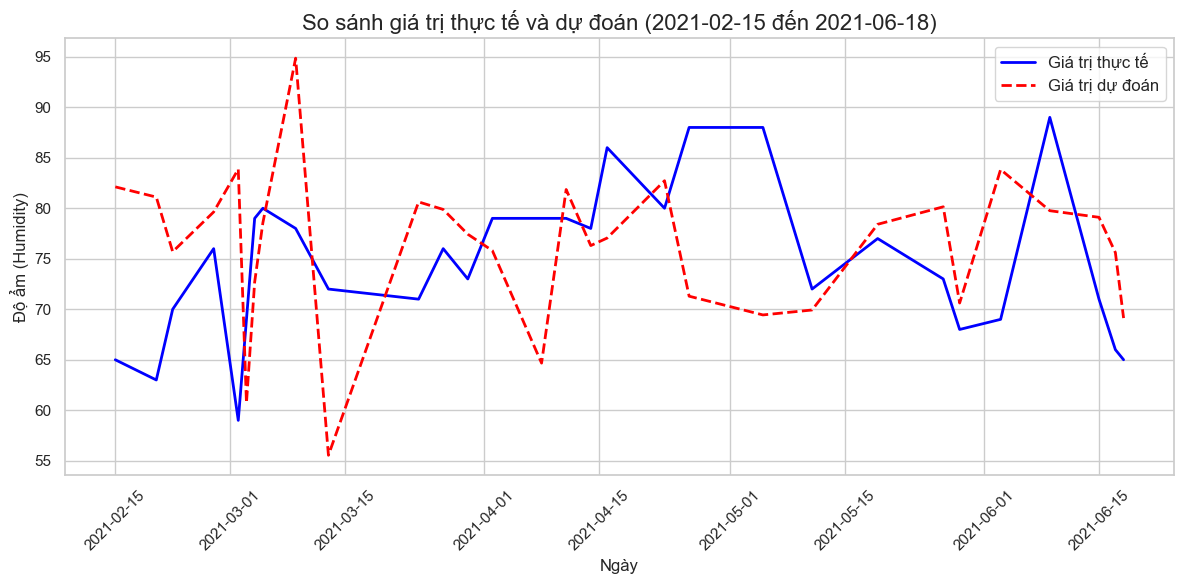

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Tạo pipeline với Polynomial Features và Linear Regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('lr', LinearRegression())
])

# Định nghĩa tham số cần tìm kiếm
param_grid = {
    'poly__degree': [1, 2, 3, 4],  # Độ bậc đa thức
    'lr__fit_intercept': [True, False]
}

# Grid Search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất
best_params = grid_search.best_params_
print("Best Parameters for Linear Regression:", best_params)

# Dự đoán với mô hình tốt nhất
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# Chọn khoảng thời gian hiển thị
start_date = y_test.index[-30]  # 30 ngày cuối trong tập kiểm tra
end_date = y_test.index[-1]

# Lọc dữ liệu cho khoảng thời gian này
y_test_filtered = y_test.loc[start_date:end_date]
y_pred_filtered = pd.Series(y_pred, index=y_test.index).loc[start_date:end_date]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(y_test_filtered.index, y_test_filtered, label='Giá trị thực tế', color='blue', linewidth=2)
plt.plot(y_pred_filtered.index, y_pred_filtered, label='Giá trị dự đoán', color='red', linestyle='--', linewidth=2)
plt.title(f'So sánh giá trị thực tế và dự đoán ({start_date.date()} đến {end_date.date()})', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Độ ẩm (Humidity)', fontsize=12)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [154]:
import joblib

# Lưu mô hình tốt nhất
joblib.dump(best_rf, '/Model/Model_Vietnam\Random_Forest_model/Yen_Bai_random_forest.pkl')
joblib.dump(best_lr, '/Model/Model_Vietnam\Linear_Regression_model/Yen_Bai_linear_regression.pkl')
print("Mô hình tốt nhất đã được lưu thành công!")


Mô hình tốt nhất đã được lưu thành công!
